# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('hospital_readmission_risk_10000.csv')
df

,patient_id,age,gender,weight_kg,height_cm,bmi,num_previous_admissions,chronic_conditions,medications_count,last_hemoglobin,...,length_of_stay,procedures_count,smoking_status,alcohol_use,physical_activity,insurance_type,followup_compliance,social_support,mental_health_issue,readmission_risk
0,d8fd1a56-a5d8-499b-917c-f9ac8d369f9b,18,Male,57,157,23.1,8,Heart Disease,8,16.2,...,7,0,Current,Moderate,Medium,Private,Poor,Weak,Yes,Medium
1,2e9b4349-69e5-494f-b806-947ec5b5bb7c,23,Female,117,150,52.0,6,Diabetes,6,13.1,...,21,2,Never,High,Medium,Private,Good,Weak,Yes,High
2,6f279c22-3b20-4328-9dac-466de7c47a51,80,Female,61,141,30.7,5,Heart Disease,8,15.4,...,2,0,Never,Moderate,Low,Public,Good,Weak,No,Low
3,1af43d48-79a9-4408-a1f1-13c58d7221fd,15,Female,47,164,17.5,0,Hypertension,1,14.2,...,8,3,Former,NaN,High,Private,Good,Weak,No,High
4,e7903dbe-839e-4ea6-a6d0-83438a981a9b,14,Male,67,179,20.9,6,Heart Disease,0,14.7,...,3,0,Former,High,High,Uninsured,Poor,Weak,No,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,37b15f13-ab5d-4881-a12f-2a3a10a76c37,59,Male,58,163,21.8,7,Heart Disease,1,11.4,...,7,2,Never,Moderate,High,Public,Poor,Strong,No,Medium
9995,8bf21174-05e2-4d75-9a82-3f9fae1ac713,33,Male,71,166,25.8,8,Heart Disease,6,15.0,...,7,1,Never,NaN,Medium,Uninsured,Good,Strong,Yes,Medium
9996,77912d1d-d45f-4681-ab06-1d3853a25eed,3,Male,111,160,43.4,2,Diabetes,2,13.1,...,7,4,Former,Moderate,Medium,Private,Poor,Strong,No,Medium
9997,30aea26e-a9df-4e0c-9e21-91318ee643b0,68,Male,97,190,26.9,3,COPD,3,12.4,...,16,4,Former,High,Low,Public,Good,Strong,No,Low


## Exploratory Data Analysis

In [3]:
df.shape

(9999, 23)

In [4]:
df.describe()

,age,weight_kg,height_cm,bmi,num_previous_admissions,medications_count,last_hemoglobin,last_glucose,last_creatinine,length_of_stay,procedures_count
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000
mean,44.464046,79.254825,169.377138,28.546015,4.497050,4.433643,13.994369,135.485759,1.24427,15.051805,2.010301
std,25.987773,23.168501,17.347572,10.450597,2.869846,2.874026,2.297621,37.488959,0.43686,8.360688,1.414848
min,0.000000,40.000000,140.000000,10.100000,0.000000,0.000000,10.000000,70.000000,0.50000,1.000000,0.000000
25%,22.000000,59.000000,154.000000,20.400000,2.000000,2.000000,12.000000,102.800000,0.86000,8.000000,1.000000
50%,45.000000,79.000000,169.000000,27.400000,5.000000,4.000000,14.000000,135.500000,1.24000,15.000000,2.000000
75%,67.000000,99.000000,184.500000,35.100000,7.000000,7.000000,16.000000,168.400000,1.62000,22.000000,3.000000
max,89.000000,119.000000,199.000000,60.200000,9.000000,9.000000,18.000000,200.000000,2.00000,29.000000,4.000000


In [5]:
df.nunique()

patient_id                 9999
age                          90
gender                        2
weight_kg                    80
height_cm                    60
bmi                         480
num_previous_admissions      10
chronic_conditions            4
medications_count            10
last_hemoglobin              81
last_glucose               1301
last_creatinine             151
admission_type                3
length_of_stay               29
procedures_count              5
smoking_status                3
alcohol_use                   2
physical_activity             3
insurance_type                3
followup_compliance           2
social_support                2
mental_health_issue           2
readmission_risk              3
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               9999 non-null   object 
 1   age                      9999 non-null   int64  
 2   gender                   9999 non-null   object 
 3   weight_kg                9999 non-null   int64  
 4   height_cm                9999 non-null   int64  
 5   bmi                      9999 non-null   float64
 6   num_previous_admissions  9999 non-null   int64  
 7   chronic_conditions       7967 non-null   object 
 8   medications_count        9999 non-null   int64  
 9   last_hemoglobin          9999 non-null   float64
 10  last_glucose             9999 non-null   float64
 11  last_creatinine          9999 non-null   float64
 12  admission_type           9999 non-null   object 
 13  length_of_stay           9999 non-null   int64  
 14  procedures_count        

In [7]:
df.sample

<bound method NDFrame.sample of                                 patient_id  age  gender  weight_kg  height_cm  \
0     d8fd1a56-a5d8-499b-917c-f9ac8d369f9b   18    Male         57        157   
1     2e9b4349-69e5-494f-b806-947ec5b5bb7c   23  Female        117        150   
2     6f279c22-3b20-4328-9dac-466de7c47a51   80  Female         61        141   
3     1af43d48-79a9-4408-a1f1-13c58d7221fd   15  Female         47        164   
4     e7903dbe-839e-4ea6-a6d0-83438a981a9b   14    Male         67        179   
...                                    ...  ...     ...        ...        ...   
9994  37b15f13-ab5d-4881-a12f-2a3a10a76c37   59    Male         58        163   
9995  8bf21174-05e2-4d75-9a82-3f9fae1ac713   33    Male         71        166   
9996  77912d1d-d45f-4681-ab06-1d3853a25eed    3    Male        111        160   
9997  30aea26e-a9df-4e0c-9e21-91318ee643b0   68    Male         97        190   
9998  a2ff97be-6e2e-4565-b1cf-2370870b664b   20  Female         55        150

In [8]:
df.isna().sum()

patient_id                    0
age                           0
gender                        0
weight_kg                     0
height_cm                     0
bmi                           0
num_previous_admissions       0
chronic_conditions         2032
medications_count             0
last_hemoglobin               0
last_glucose                  0
last_creatinine               0
admission_type                0
length_of_stay                0
procedures_count              0
smoking_status                0
alcohol_use                3243
physical_activity             0
insurance_type                0
followup_compliance           0
social_support                0
mental_health_issue           0
readmission_risk              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.fillna(0, inplace=True)
df

,patient_id,age,gender,weight_kg,height_cm,bmi,num_previous_admissions,chronic_conditions,medications_count,last_hemoglobin,...,length_of_stay,procedures_count,smoking_status,alcohol_use,physical_activity,insurance_type,followup_compliance,social_support,mental_health_issue,readmission_risk
0,d8fd1a56-a5d8-499b-917c-f9ac8d369f9b,18,Male,57,157,23.1,8,Heart Disease,8,16.2,...,7,0,Current,Moderate,Medium,Private,Poor,Weak,Yes,Medium
1,2e9b4349-69e5-494f-b806-947ec5b5bb7c,23,Female,117,150,52.0,6,Diabetes,6,13.1,...,21,2,Never,High,Medium,Private,Good,Weak,Yes,High
2,6f279c22-3b20-4328-9dac-466de7c47a51,80,Female,61,141,30.7,5,Heart Disease,8,15.4,...,2,0,Never,Moderate,Low,Public,Good,Weak,No,Low
3,1af43d48-79a9-4408-a1f1-13c58d7221fd,15,Female,47,164,17.5,0,Hypertension,1,14.2,...,8,3,Former,0,High,Private,Good,Weak,No,High
4,e7903dbe-839e-4ea6-a6d0-83438a981a9b,14,Male,67,179,20.9,6,Heart Disease,0,14.7,...,3,0,Former,High,High,Uninsured,Poor,Weak,No,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,37b15f13-ab5d-4881-a12f-2a3a10a76c37,59,Male,58,163,21.8,7,Heart Disease,1,11.4,...,7,2,Never,Moderate,High,Public,Poor,Strong,No,Medium
9995,8bf21174-05e2-4d75-9a82-3f9fae1ac713,33,Male,71,166,25.8,8,Heart Disease,6,15.0,...,7,1,Never,0,Medium,Uninsured,Good,Strong,Yes,Medium
9996,77912d1d-d45f-4681-ab06-1d3853a25eed,3,Male,111,160,43.4,2,Diabetes,2,13.1,...,7,4,Former,Moderate,Medium,Private,Poor,Strong,No,Medium
9997,30aea26e-a9df-4e0c-9e21-91318ee643b0,68,Male,97,190,26.9,3,COPD,3,12.4,...,16,4,Former,High,Low,Public,Good,Strong,No,Low


In [12]:
num_cols = ['age', 'weight_kg', 'height_cm', 'bmi', 'num_previous_admissions', 'medications_count', 'last_hemoglobin', 'last_glucose', 'last_creatinine', 'length_of_stay', 'procedures_count']

cat_cols = ['gender', 'chronic_conditions', 'admission_type', 'smoking_status', 'alcohol_use', 'physical_activity', 'insurance_type', 'followup_compliance', 'social_support', 'mental_health_issue', 'readmission_risk']

print(len(num_cols))
print(len(cat_cols))

11
11


## Visualization

### 1. Histogram Of Num_Cols

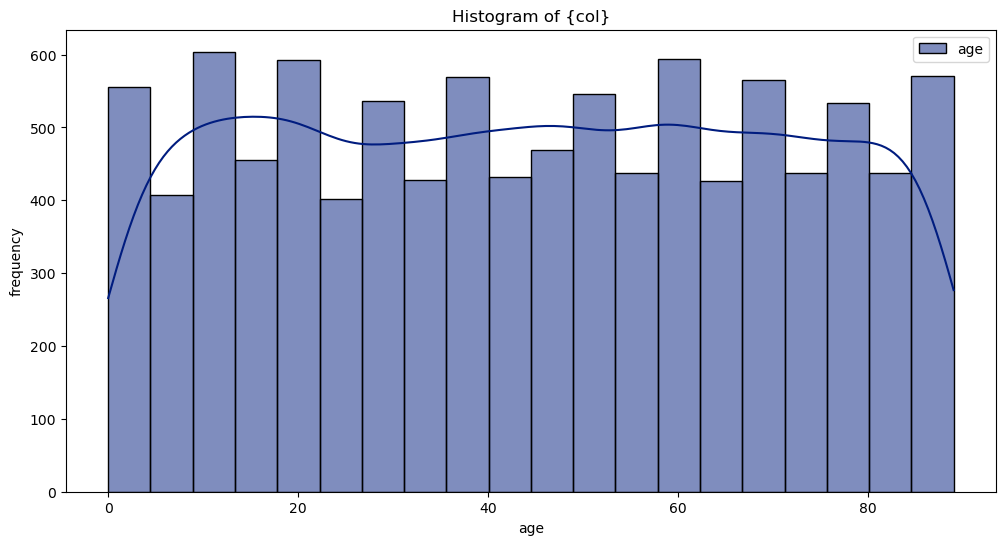

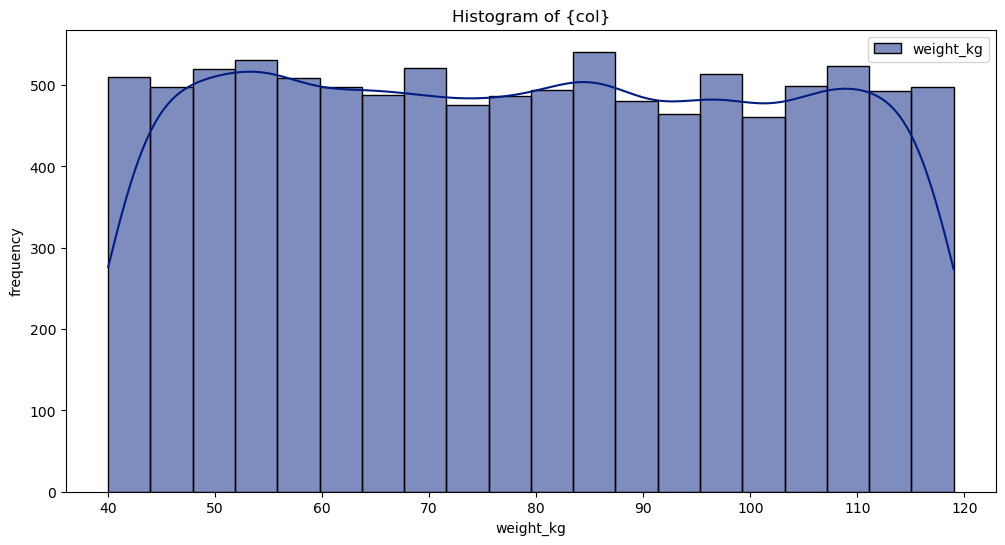

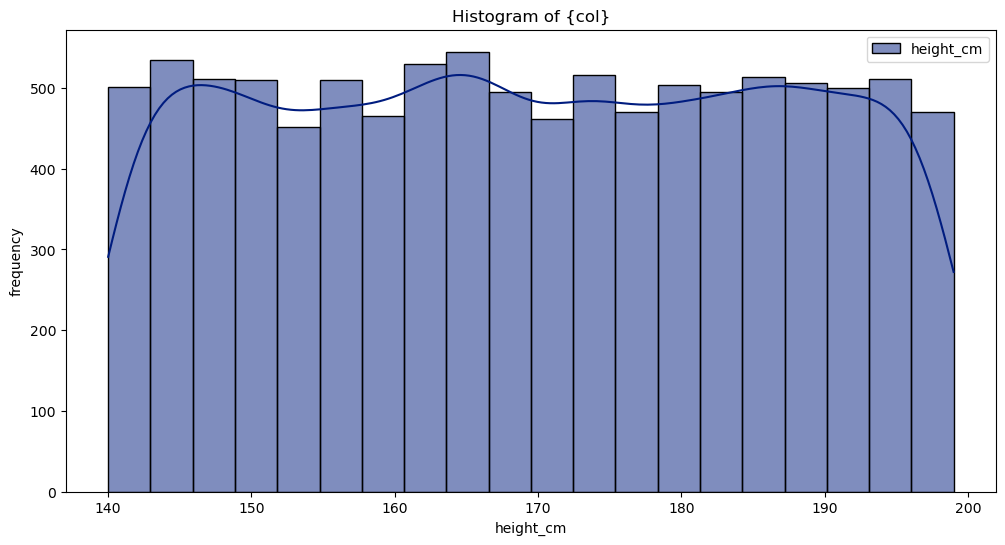

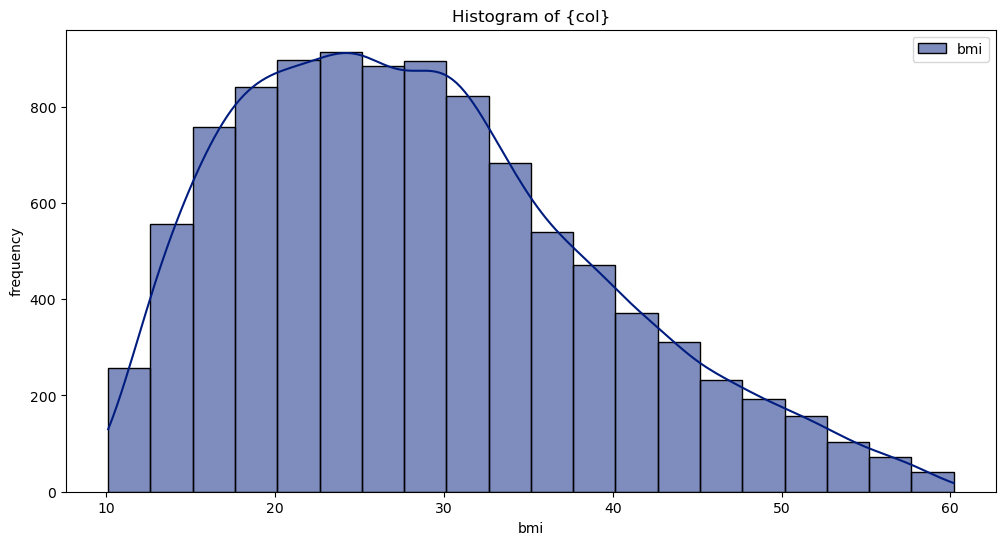

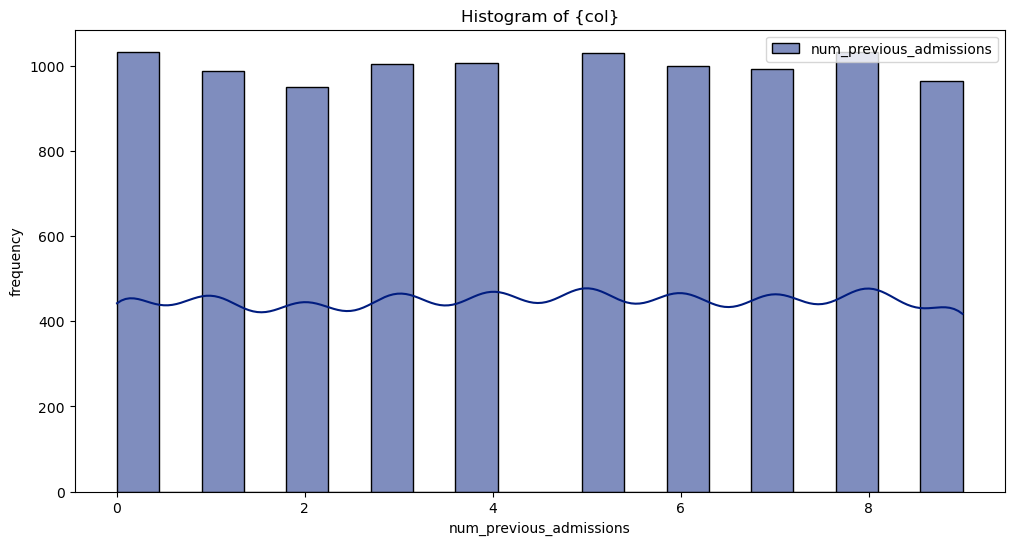

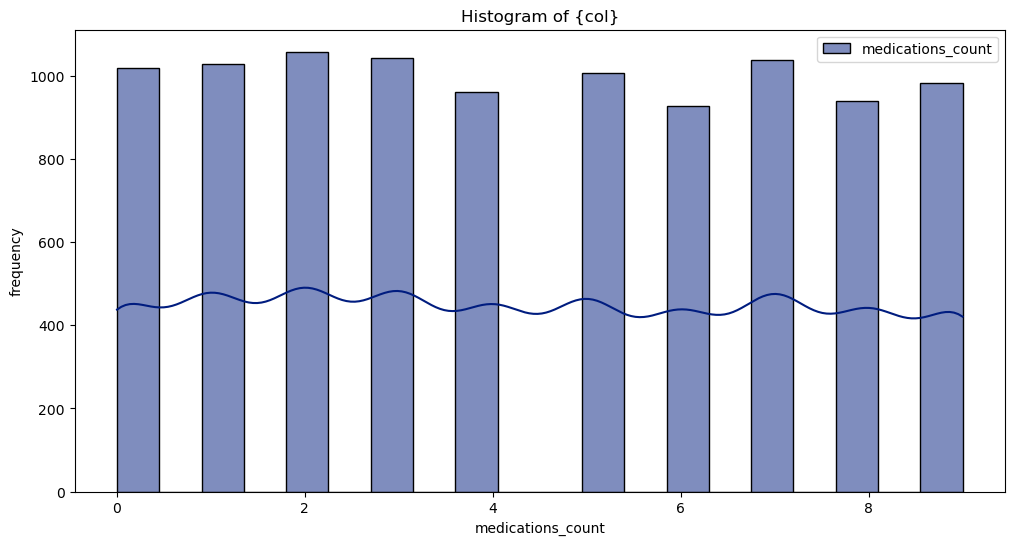

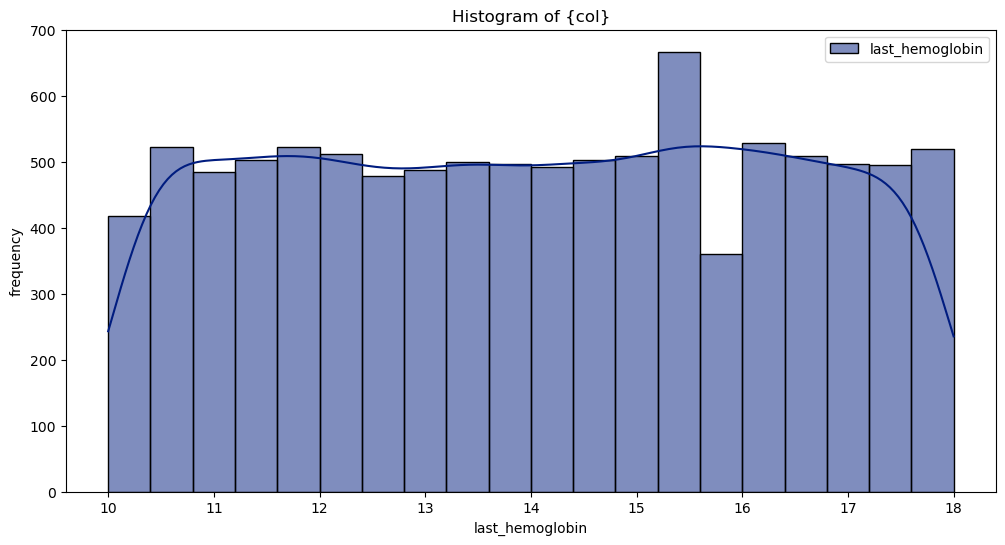

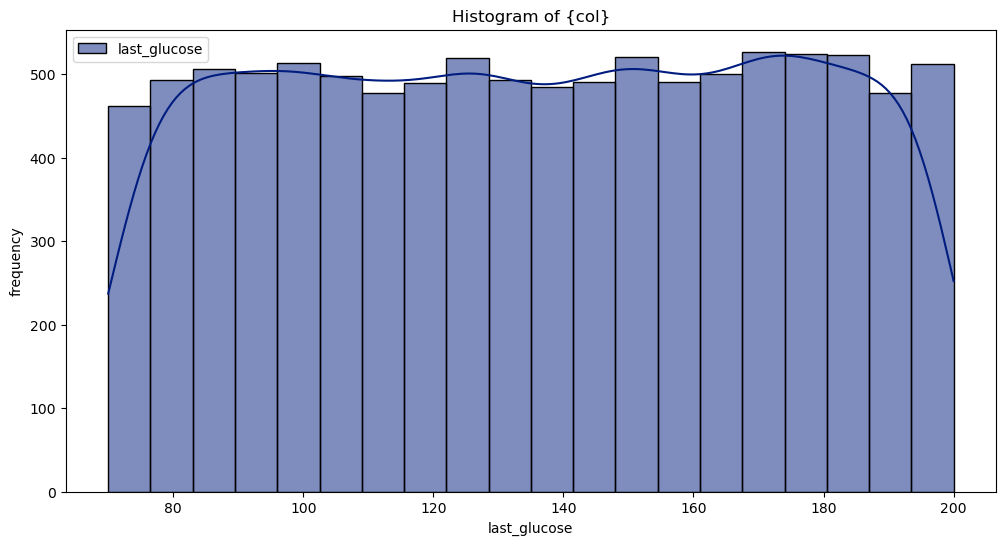

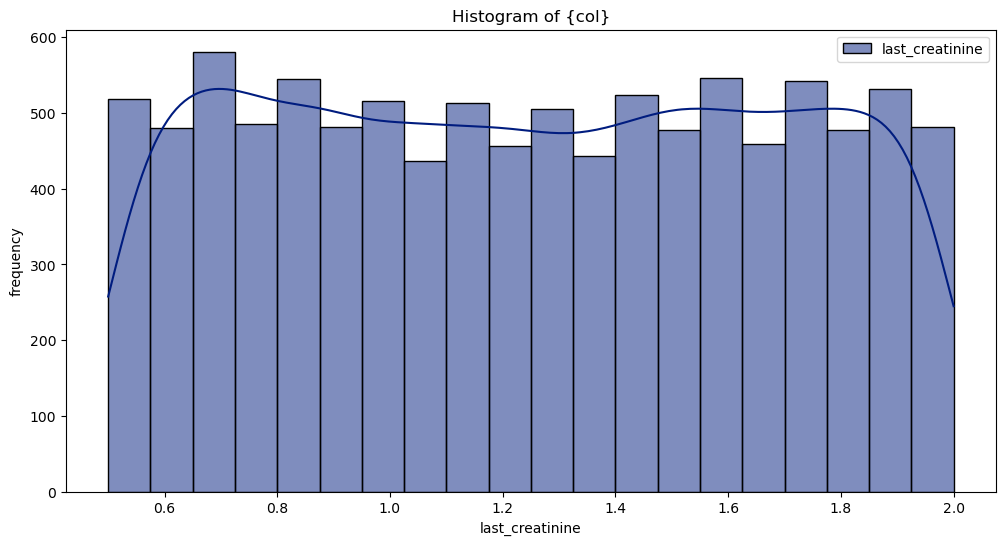

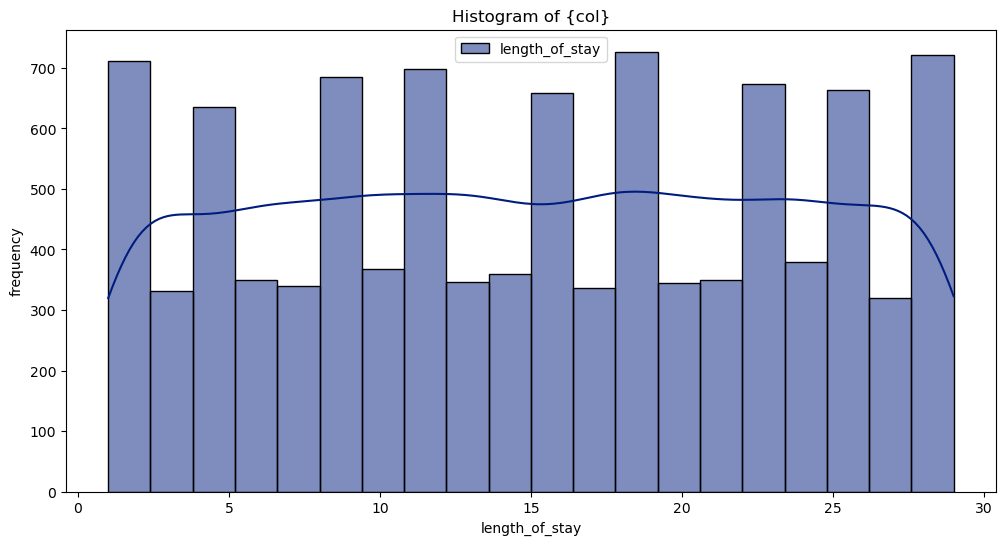

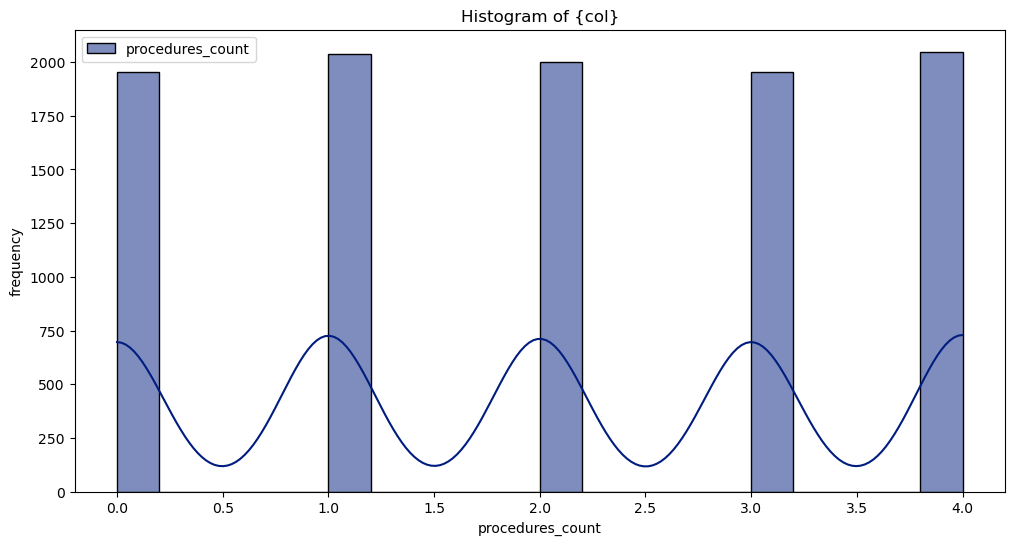

In [13]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='dark', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

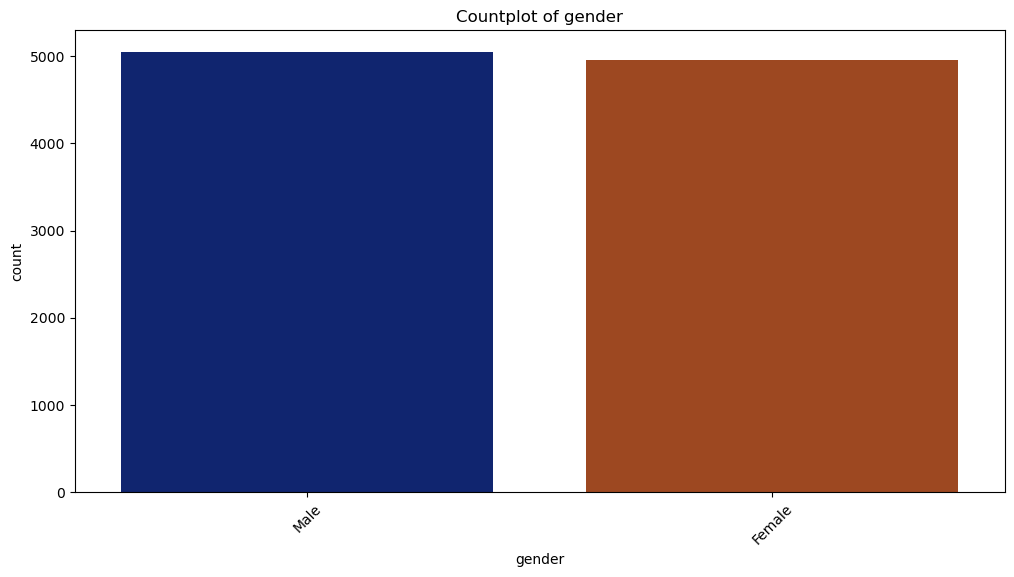

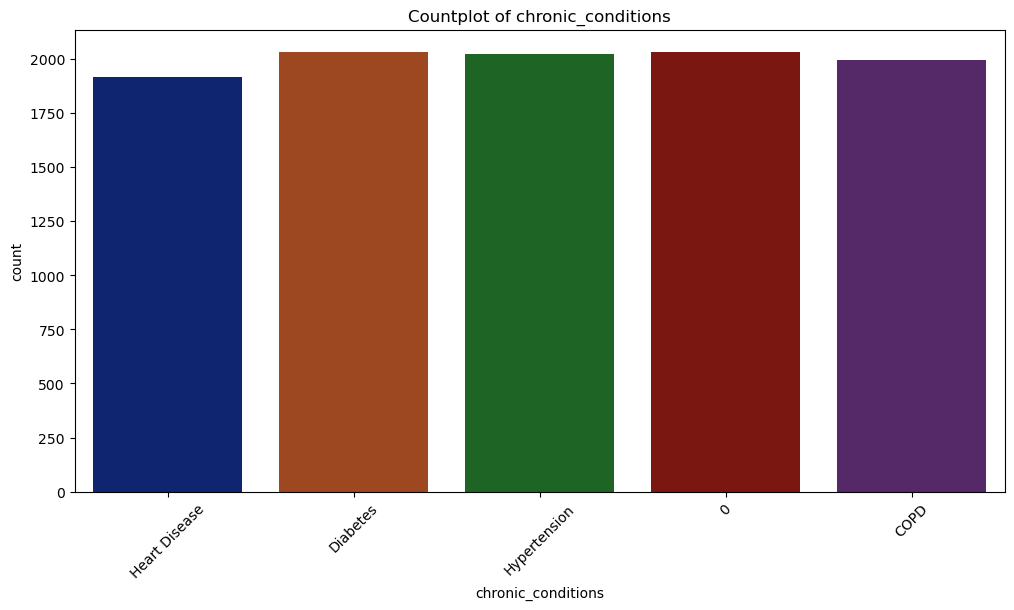

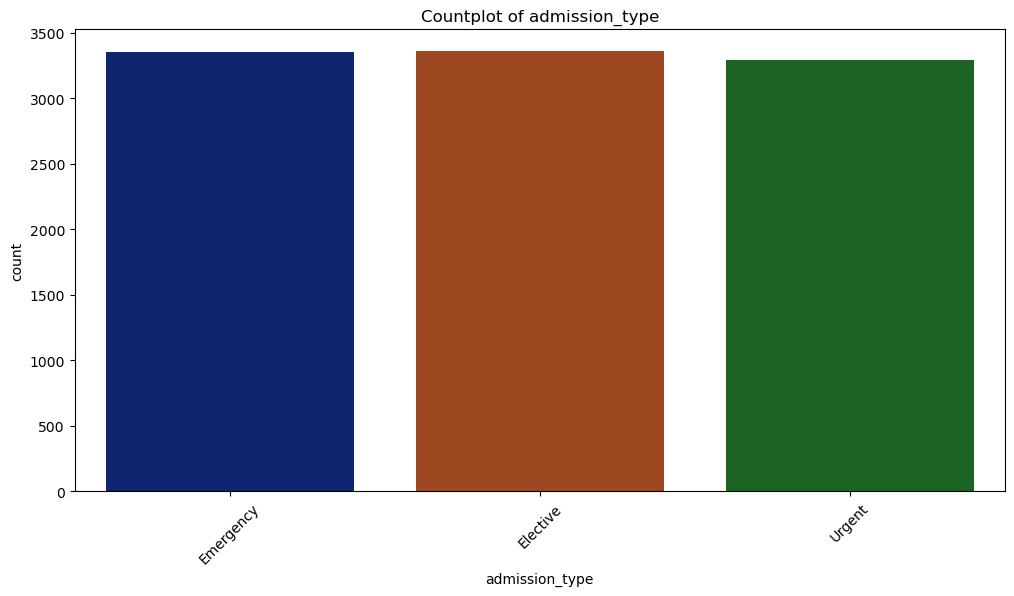

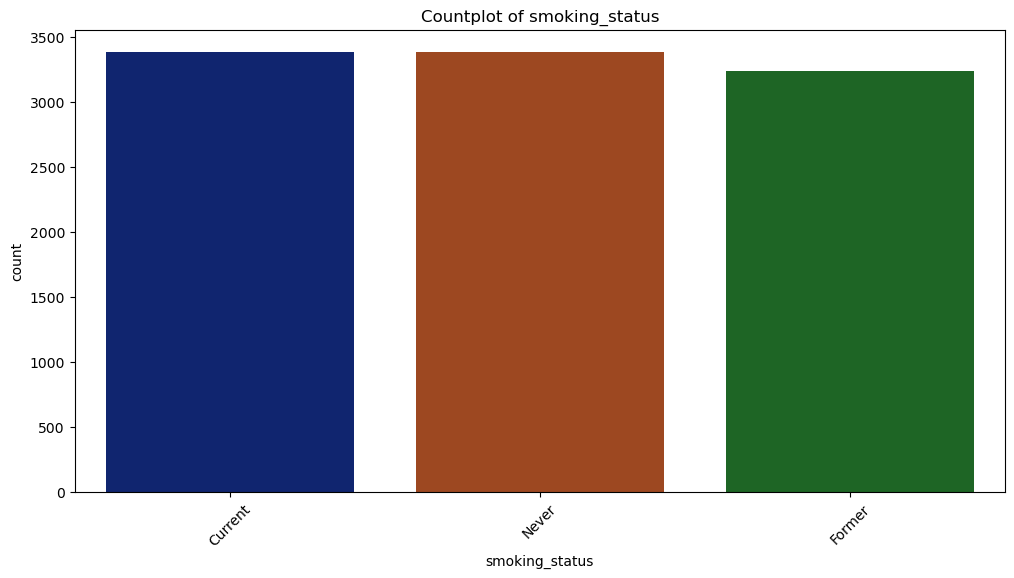

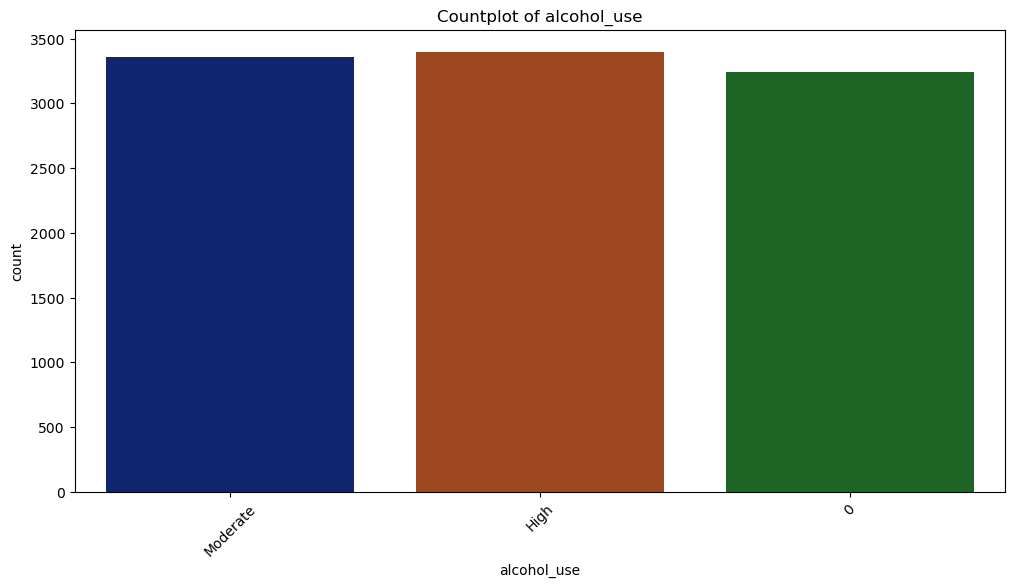

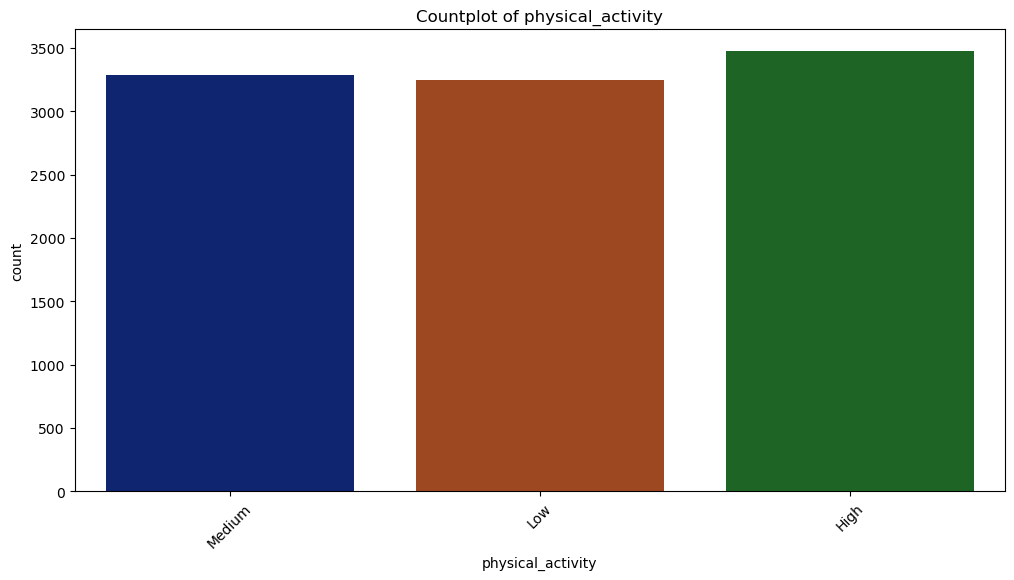

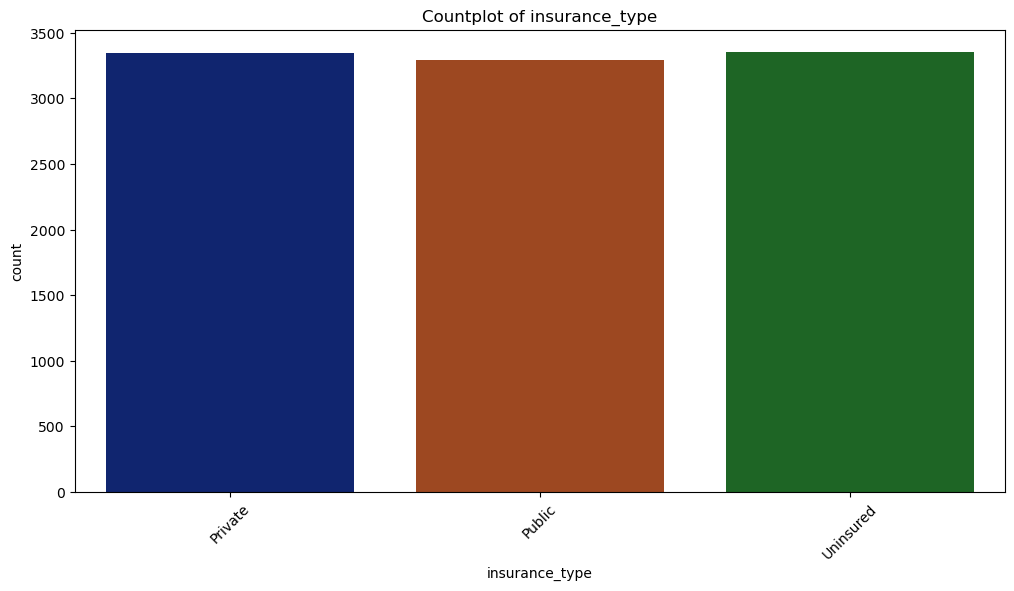

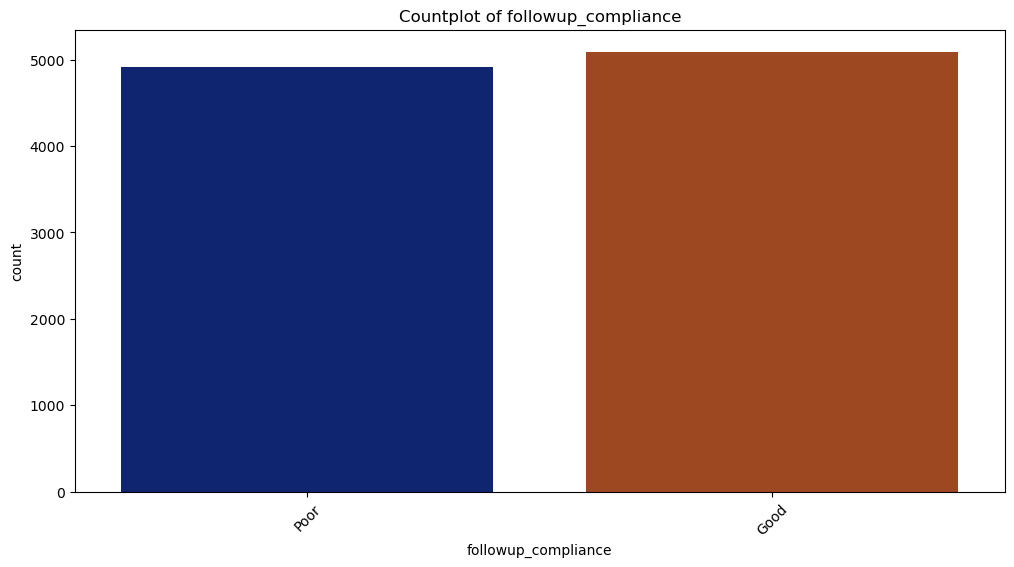

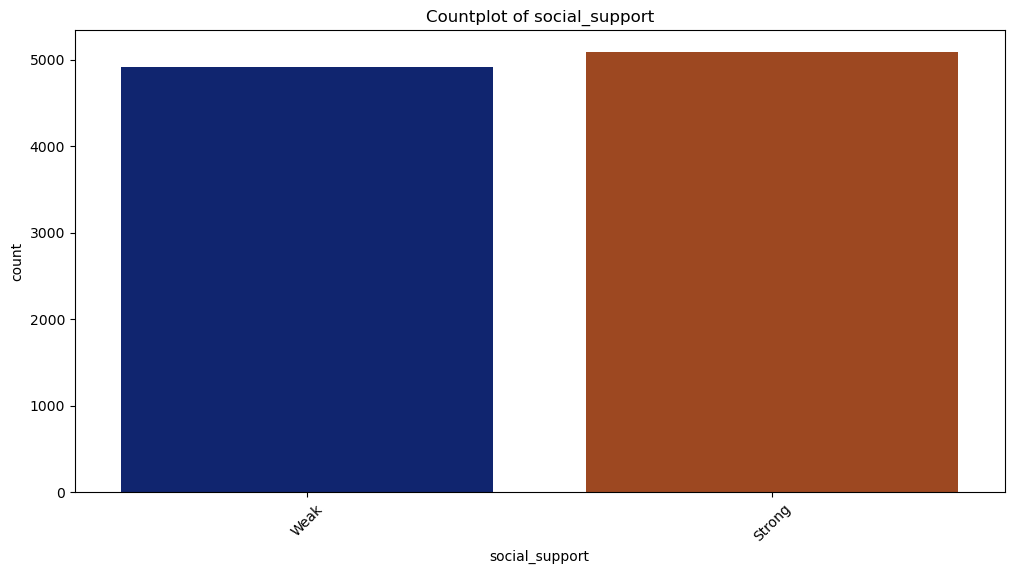

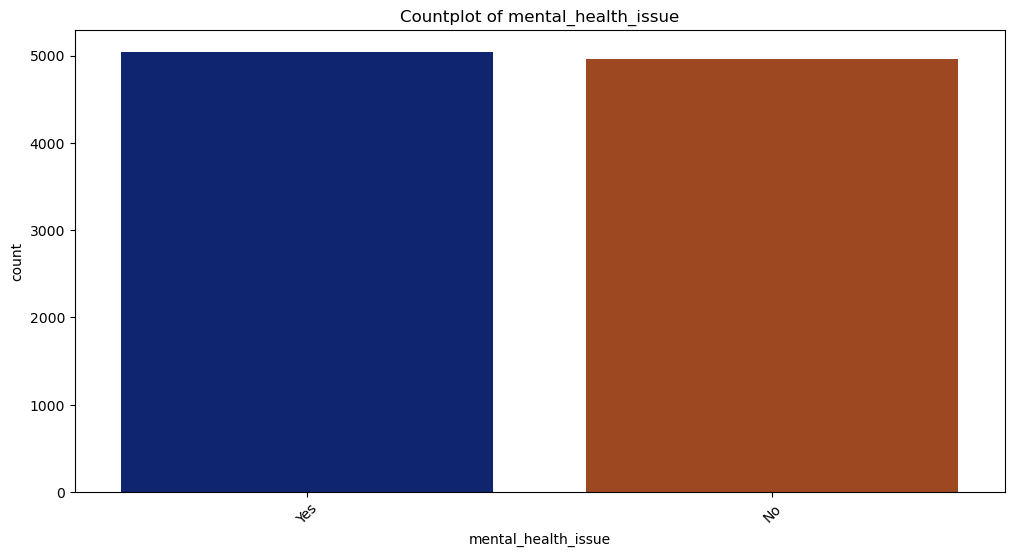

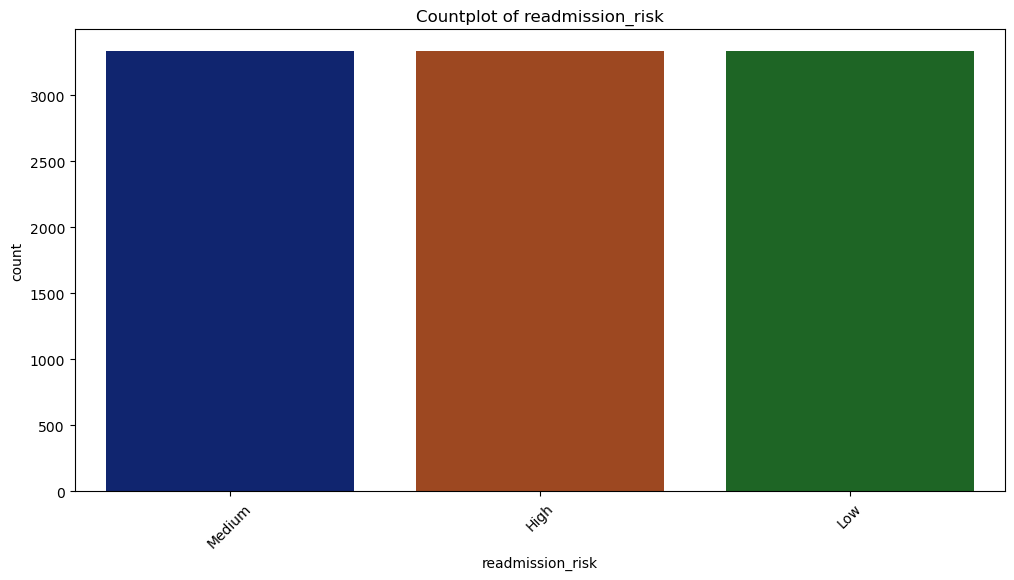

In [14]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='dark')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Age vs Weight by Gender

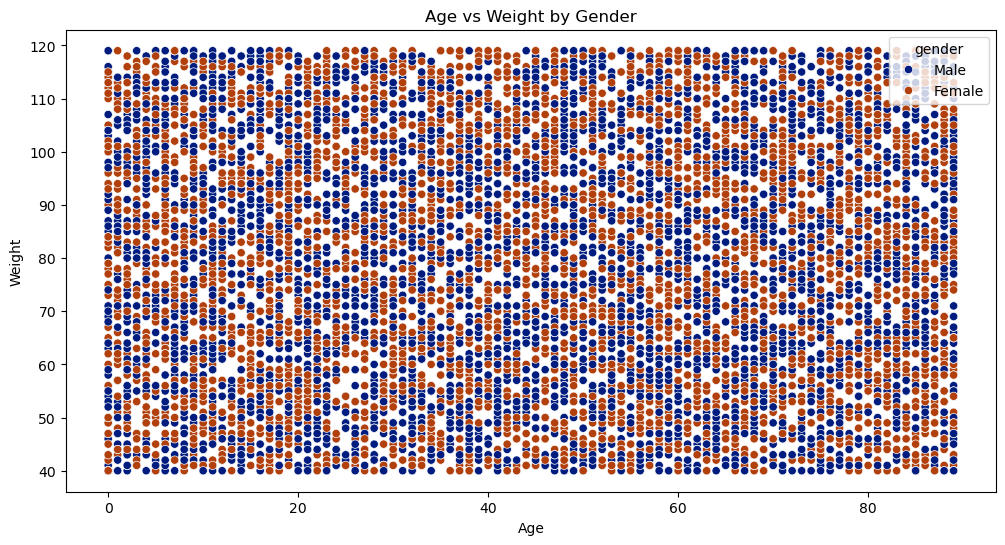

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['weight_kg'], hue=df['gender'], palette='dark')
plt.title('Age vs Weight by Gender')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

### 4. BMI vs Last Glucose

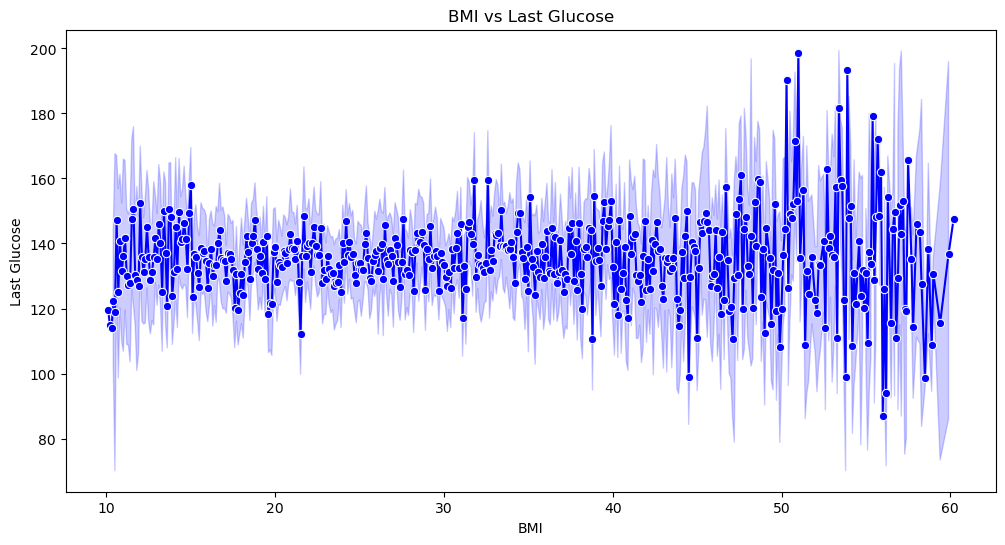

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['bmi'], y=df['last_glucose'], marker='o', color='blue')
plt.title('BMI vs Last Glucose')
plt.xlabel('BMI')
plt.ylabel('Last Glucose')
plt.show()

### 5. Distribution Of Height (cm) vs Weight (kg)

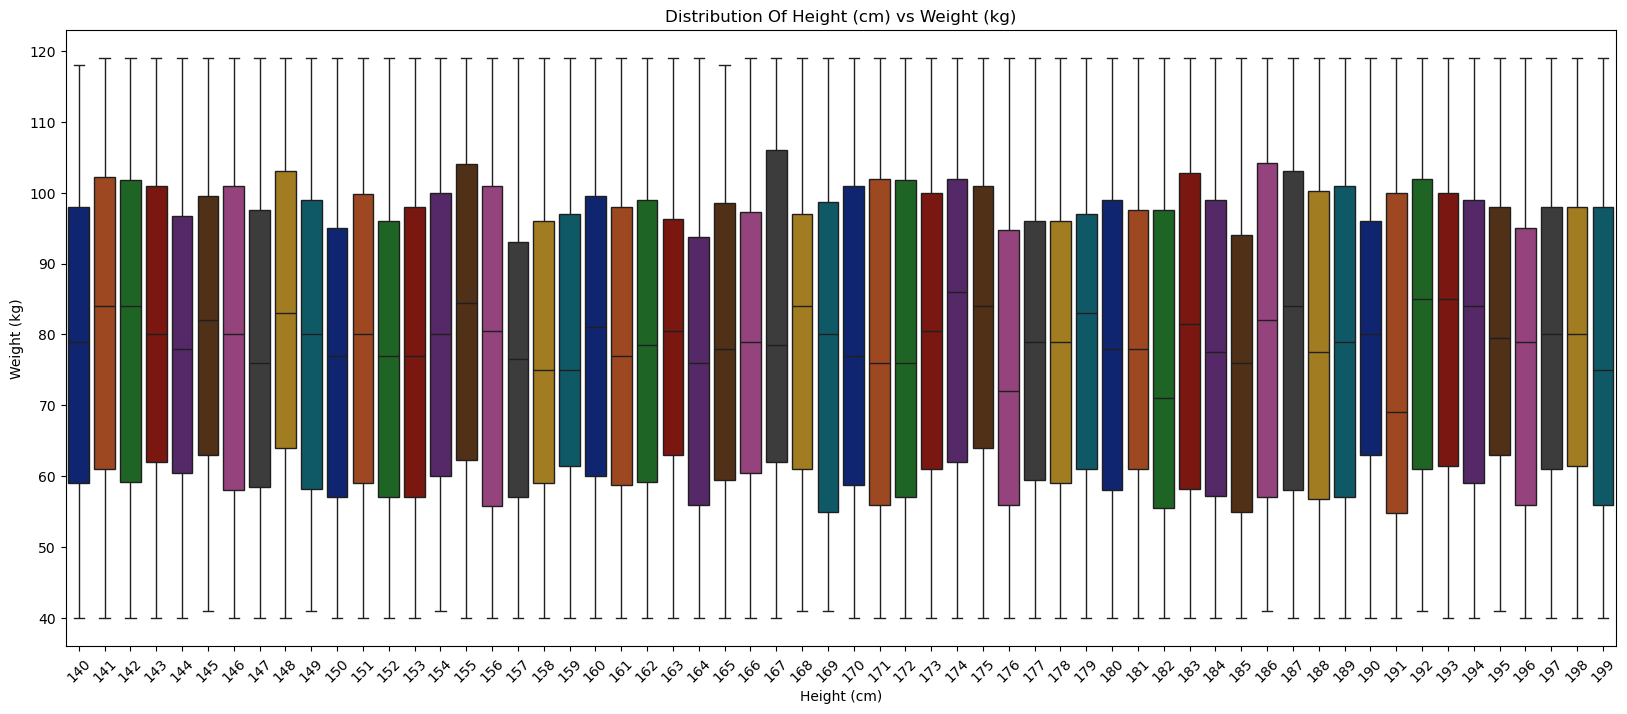

In [23]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['height_cm'], y=df['weight_kg'], data=df, palette='dark')
plt.title('Distribution Of Height (cm) vs Weight (kg)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

### 6. BMI by Smoking Status

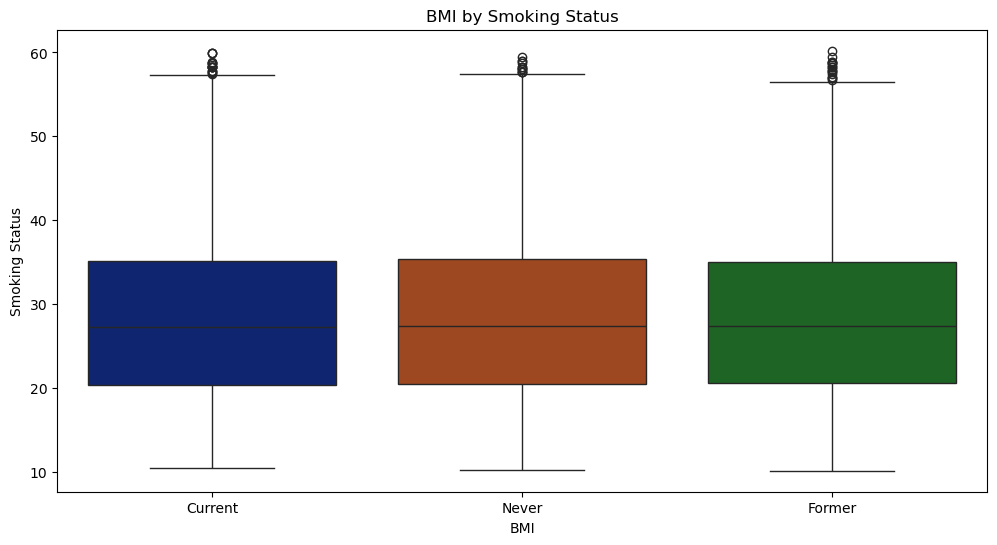

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['smoking_status'], y=df['bmi'], data=df, palette='dark')
plt.title('BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Smoking Status')
plt.show()

### 7. BMI by Alcohol Use

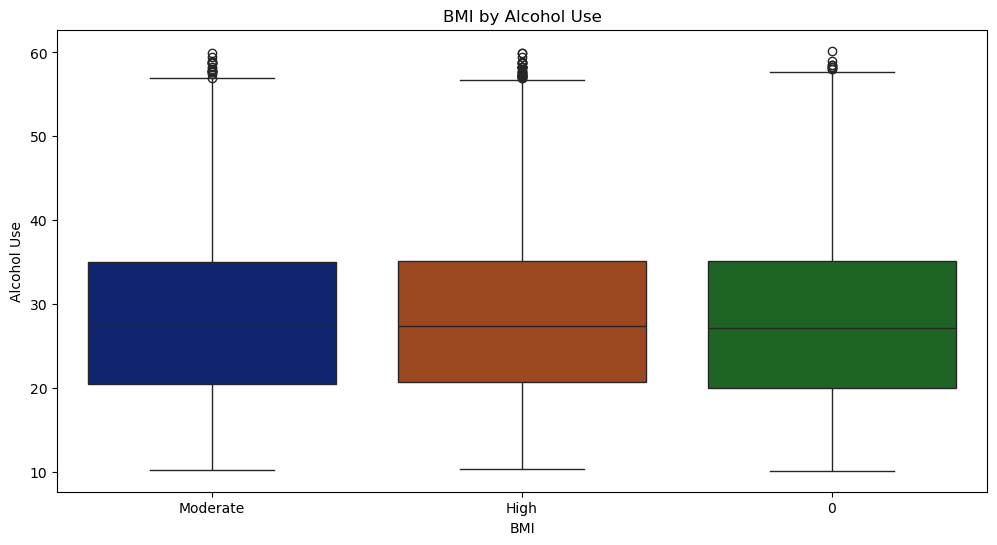

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['alcohol_use'], y=df['bmi'], data=df, palette='dark')
plt.title('BMI by Alcohol Use')
plt.xlabel('BMI')
plt.ylabel('Alcohol Use')
plt.show()

### 8. Age vs Weight KG

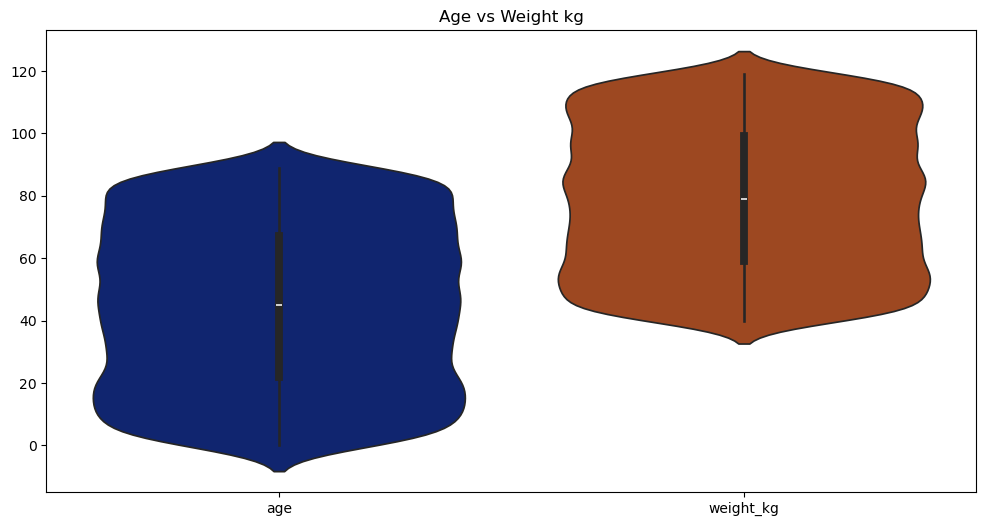

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['age','weight_kg']], palette='dark')
plt.title('Age vs Weight kg')
plt.show()

### 9. Correlation Map

In [29]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,age,weight_kg,height_cm,bmi,num_previous_admissions,medications_count,last_hemoglobin,last_glucose,last_creatinine,length_of_stay,procedures_count
0,18,57,157,23.1,8,8,16.2,135.1,0.96,7,0
1,23,117,150,52.0,6,6,13.1,137.2,1.11,21,2
2,80,61,141,30.7,5,8,15.4,82.1,0.71,2,0
3,15,47,164,17.5,0,1,14.2,183.5,0.57,8,3
4,14,67,179,20.9,6,0,14.7,84.0,1.27,3,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,59,58,163,21.8,7,1,11.4,164.9,1.02,7,2
9995,33,71,166,25.8,8,6,15.0,156.9,0.91,7,1
9996,3,111,160,43.4,2,2,13.1,147.4,0.82,7,4
9997,68,97,190,26.9,3,3,12.4,100.3,1.75,16,4


In [30]:
correlation = numeric_df.corr()

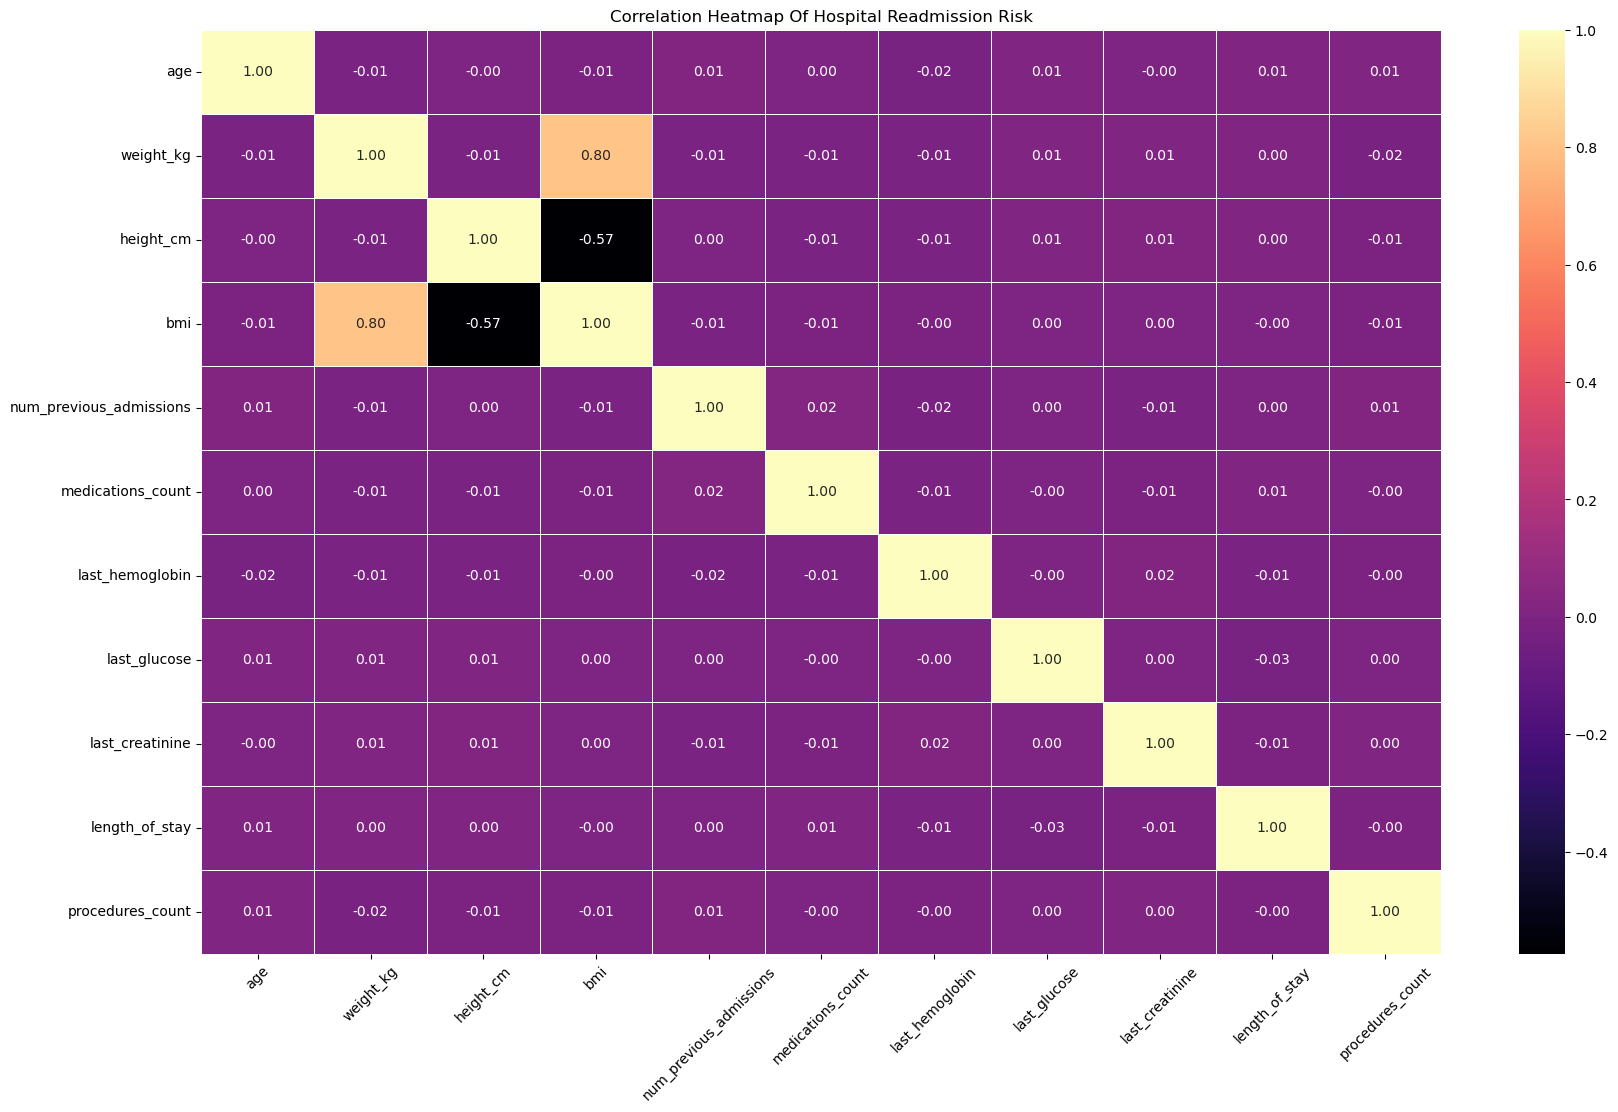

In [31]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Hospital Readmission Risk')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

In [35]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
df['admission_type'].unique()

array(['Emergency', 'Elective', 'Urgent'], dtype=object)

In [37]:
df['smoking_status'].unique()

array(['Current', 'Never', 'Former'], dtype=object)

In [38]:
df['alcohol_use'].unique()

array(['Moderate', 'High', 0], dtype=object)

In [39]:
df['physical_activity'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [40]:
df['insurance_type'].unique()

array(['Private', 'Public', 'Uninsured'], dtype=object)

In [41]:
df['followup_compliance'].unique()

array(['Poor', 'Good'], dtype=object)

In [42]:
df['social_support'].unique()

array(['Weak', 'Strong'], dtype=object)

In [43]:
df['mental_health_issue'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df['readmission_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [45]:
val = {'admission_type': {'Emergency': 0, 'Elective': 1, 'Urgent': 2}, 
       'smoking_status': {'Never': 0, 'Current': 1, 'Former': 2},
       'alcohol_use': {'0': 0, 'High': 1, 'Moderate': 2},
       'physical_activity': {'Low': 0, 'High': 1, 'Medium': 2},
       'insurance_type': {'Uninsured': 0, 'Public': 1, 'Private': 2},
       'followup_compliance': {'Poor': 0, 'Good': 1},
       'social_support': {'Weak': 0, 'Strong': 1},
       'mental_health_issue': {'No': 0, 'Yes': 1},
       'readmission_risk': {'Low': 0, 'High': 1, 'Medium': 2},
       'gender': {'Female': 0, 'Male': 1}
       }
df.replace(val, inplace=True)
df

,patient_id,age,gender,weight_kg,height_cm,bmi,num_previous_admissions,chronic_conditions,medications_count,last_hemoglobin,...,length_of_stay,procedures_count,smoking_status,alcohol_use,physical_activity,insurance_type,followup_compliance,social_support,mental_health_issue,readmission_risk
0,d8fd1a56-a5d8-499b-917c-f9ac8d369f9b,18,1,57,157,23.1,8,Heart Disease,8,16.2,...,7,0,1,2,2,2,0,0,1,2
1,2e9b4349-69e5-494f-b806-947ec5b5bb7c,23,0,117,150,52.0,6,Diabetes,6,13.1,...,21,2,0,1,2,2,1,0,1,1
2,6f279c22-3b20-4328-9dac-466de7c47a51,80,0,61,141,30.7,5,Heart Disease,8,15.4,...,2,0,0,2,0,1,1,0,0,0
3,1af43d48-79a9-4408-a1f1-13c58d7221fd,15,0,47,164,17.5,0,Hypertension,1,14.2,...,8,3,2,0,1,2,1,0,0,1
4,e7903dbe-839e-4ea6-a6d0-83438a981a9b,14,1,67,179,20.9,6,Heart Disease,0,14.7,...,3,0,2,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,37b15f13-ab5d-4881-a12f-2a3a10a76c37,59,1,58,163,21.8,7,Heart Disease,1,11.4,...,7,2,0,2,1,1,0,1,0,2
9995,8bf21174-05e2-4d75-9a82-3f9fae1ac713,33,1,71,166,25.8,8,Heart Disease,6,15.0,...,7,1,0,0,2,0,1,1,1,2
9996,77912d1d-d45f-4681-ab06-1d3853a25eed,3,1,111,160,43.4,2,Diabetes,2,13.1,...,7,4,2,2,2,2,0,1,0,2
9997,30aea26e-a9df-4e0c-9e21-91318ee643b0,68,1,97,190,26.9,3,COPD,3,12.4,...,16,4,2,1,0,1,1,1,0,0


In [46]:
features = ['age', 'weight_kg', 'height_cm', 'bmi', 'num_previous_admissions', 'medications_count', 'last_hemoglobin', 'last_glucose', 'last_creatinine', 'length_of_stay', 'procedures_count', 'admission_type', 'smoking_status', 
            'alcohol_use', 'physical_activity', 'insurance_type', 'followup_compliance', 'social_support', 'mental_health_issue', 'gender']
target = 'readmission_risk'

X = df[features]
y = df[target]

### 1. Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7999, 20) (2000, 20)


### 2. Models

In [48]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [49]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.322

 Decison Tree Accuracy: 0.338

 Random Forest Accuracy: 0.3095

 Gradient Boosting Accuracy: 0.3265

 K-Nearest Neighbors Accuracy: 0.3295

 Support Vector Machine Accuracy: 0.336


#### Best Model

In [50]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.336


### 3. Classification Report

In [51]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.25      0.29       673
           1       0.39      0.19      0.25       688
           2       0.31      0.59      0.41       639

    accuracy                           0.34      2000
   macro avg       0.35      0.34      0.32      2000
weighted avg       0.35      0.34      0.32      2000



### 4. Confusion Matrix

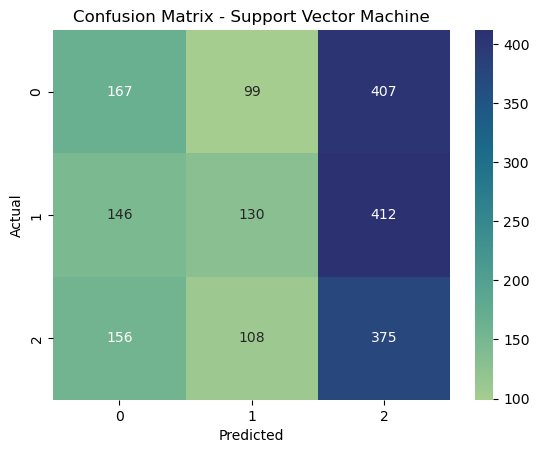

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()